In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
df = pd.read_csv('data/master.csv')

In [4]:
# Reducing the features in the dataframe to only these needed
# This will lead to smaller sized Altair Charts
gender_df = df[['Year', 'Sex', 'Season', 'Sport', 'Event', 'NOC', 'region']]

In [5]:
gender_df.head()

,Year,Sex,Season,Sport,Event,NOC,region
0,1992,M,Summer,Basketball,Basketball Men's Basketball,CHN,China
1,2012,M,Summer,Judo,Judo Men's Extra-Lightweight,CHN,China
2,1920,M,Summer,Football,Football Men's Football,DEN,Denmark
3,1900,M,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,DEN,Denmark
4,1988,F,Winter,Speed Skating,Speed Skating Women's 500 metres,NED,Netherlands


In [6]:
summer_df = gender_df[gender_df['Season'] == 'Summer']
winter_df = gender_df[gender_df['Season'] == 'Winter']

In [7]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [9]:
df_grp = summer_df.groupby(['Year', 'Sex'])
df_grp = df_grp.size().reset_index(name='count')
df_grp.head()

,Year,Sex,count
0,1896,M,380
1,1900,F,33
2,1900,M,1903
3,1904,F,16
4,1904,M,1285


In [73]:
perc = {}
for year in df_grp['Year'].unique():
    perc[year] = df_grp.loc[(df_grp['Year']==year) & (df_grp['Sex']=='F')]['count']/df_grp.loc[(df_grp['Year']==year)]['count'].sum()

print(perc)

{1896: Series([], Name: count, dtype: float64), 1900: 1    0.017045
Name: count, dtype: float64, 1904: 3    0.012298
Name: count, dtype: float64, 1906: 5    0.006347
Name: count, dtype: float64, 1908: 7    0.015156
Name: count, dtype: float64, 1912: 9    0.021535
Name: count, dtype: float64, 1920: 11    0.031221
Name: count, dtype: float64, 1924: 13    0.046627
Name: count, dtype: float64, 1928: 15    0.080929
Name: count, dtype: float64, 1932: 17    0.116874
Name: count, dtype: float64, 1936: 19    0.071934
Name: count, dtype: float64, 1948: 21    0.098048
Name: count, dtype: float64, 1952: 23    0.181016
Name: count, dtype: float64, 1956: 25    0.174176
Name: count, dtype: float64, 1960: 27    0.176746
Name: count, dtype: float64, 1964: 29    0.175019
Name: count, dtype: float64, 1968: 31    0.206917
Name: count, dtype: float64, 1972: 33    0.21283
Name: count, dtype: float64, 1976: 35    0.25136
Name: count, dtype: float64, 1980: 37    0.244194
Name: count, dtype: float64, 1984: 39 

In [ ]:
{1896: 0, 
 1900: 0.017045,
 1904: 0.012298,
 1906: 0.006347,
 1908: 0.015156,
 1912: 0.021535,
 1920: 0.031221,
 1924: 0.046627
, 1928: 0.080929
, 1932: 0.116874
, 1936: 0.071934
, 1948: 0.098048
, 1952: 0.181016
, 1956: 0.174176
, 1960: 0.176746
, 1964: 0.175019
, 1968: 0.206917
, 1972: 0.21283
, 1976: 0.25136
, 1980: 0.244194
, 1984: 0.258832
, 1988: 0.294342
, 1992: 0.317793
, 1996: 0.363425
, 2000: 0.392953
, 2004: 0.412557
, 2008: 0.427584
, 2012: 0.450077
, 2016: 0.454632

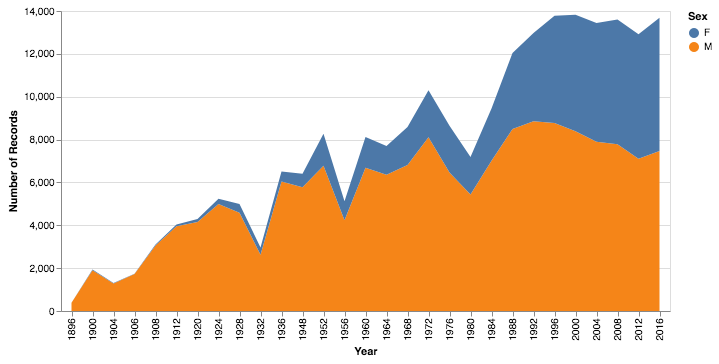

In [38]:
alt.Chart(summer_df).mark_area().encode(
    alt.X('Year:N'),
    alt.Y('count()'),
    alt.Color('Sex:N')
)

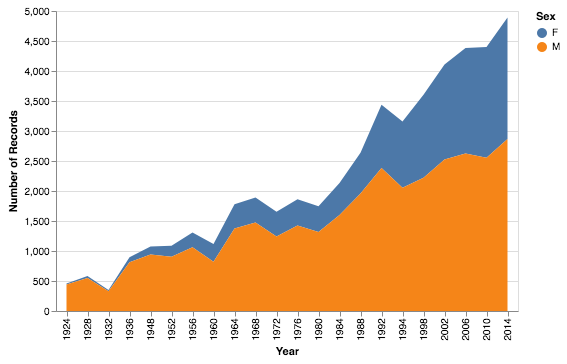

In [14]:
alt.Chart(winter_df).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('count()'),
    alt.Color('Sex:N')
)

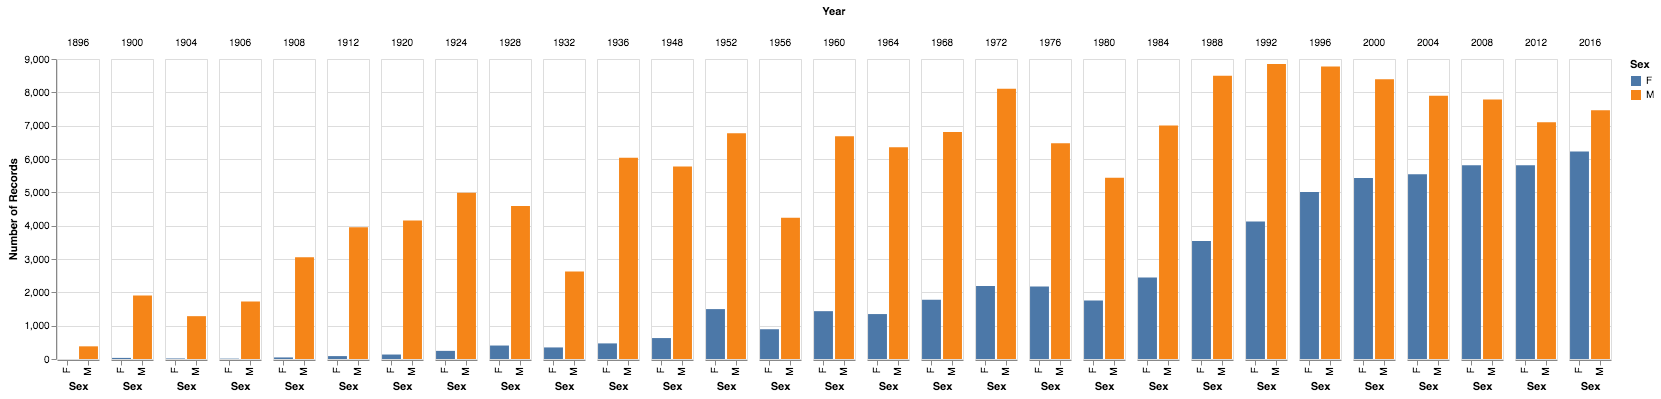

In [29]:
alt.Chart(summer_df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex):Q',
    color='Sex:N',
    column='Year:N'
)

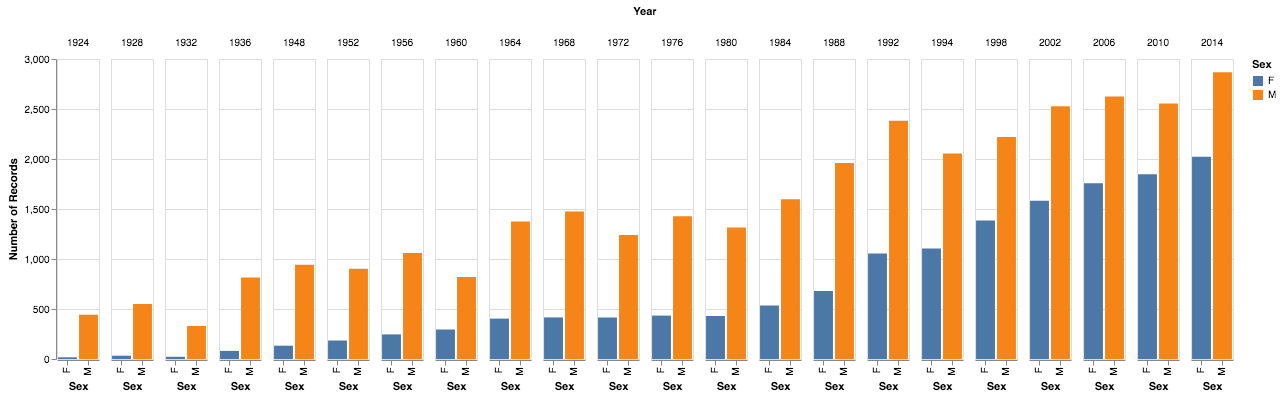

In [30]:
alt.Chart(winter_df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex):Q',
    color='Sex:N',
    column='Year:N'
)

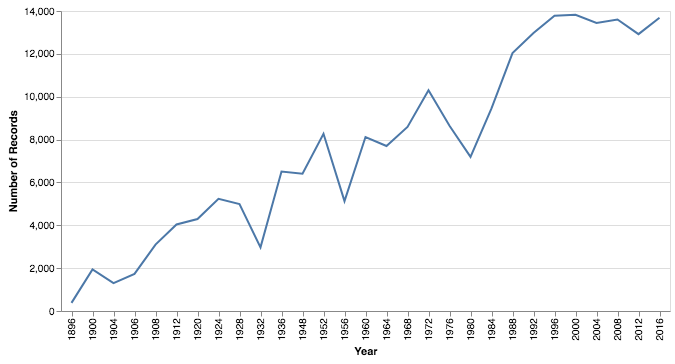

In [32]:
alt.Chart(summer_df).mark_line().encode(
    x='Year:O',
    y='count(Sex):Q',
)

In [ ]:
chart = chart.properties(title='Distribution of Weight for all Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

In [ ]:
chart.save('plots/gender/weight_histogram.png', scale_factor=7.0)

In [ ]:
# Currently the equestrian events are the only Olympic events in which women compete one-on-one against men.
# The 2016 Rio Olympic Games has both the highest ever number of women competitors and the highest percentage, with women making up about 45 percent of the total participants, according to the IOC.

In [155]:
s = summer_df.groupby(['Year', 'Sex']).agg({'Event': 'count'})
s.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Event
Year Sex            
1896 M    100.000000
1900 F      1.704545
     M     98.295455
1904 F      1.229823
     M     98.770177
1906 F      0.634737
     M     99.365263
1908 F      1.515640
     M     98.484360
1912 F      2.153465
     M     97.846535
1920 F      3.122088
     M     96.877912
1924 F      4.662717
     M     95.337283
1928 F      8.092949
     M     91.907051
1932 F     11.687437
     M     88.312563
1936 F      7.193360
     M     92.806640
1948 F      9.804840
     M     90.195160
1952 F     18.101572
     M     81.898428
1956 F     17.417593
     M     82.582407
1960 F     17.674590
     M     82.325410
1964 F     17.501948
     M     82.498052
1968 F     20.691663
     M     79.308337
1972 F     21.282997
     M     78.717003
1976 F     25.135980
     M     74.864020
1980 F     24.419413
     M     75.580587
1984 F     25.883224
     M     74.116776
1988 F     29.434244
     M     70.565756
1992 F     31.779302
     M     68.220698
1996 F     36.342525
     M     63.657475
2000 F     39.295275
     M     60.704725
2004 F     41.255672
     M     58.744328
2008 F     42.758418
     M     57.241582
2012 F     45.007740
     M     54.992260
2016 F     45.463179
     M     54.536821